# Random Forest

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
data1 = pd.read_csv("/Users/manancy/Downloads/Nancy 2/工作/Carlo /尝试的业务/RisklabDataCompetition/data1-Nancy.csv")

In [9]:
data1

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status,Repay_Status_sum,Previous_Payment_Prior_sum,Statement_sum
0,9600.0,1,3,3,32,6,110,138,5,2847,...,12,535,1671,3,4800,6799,1,44,10315,16878
1,14400.0,2,3,2,30,-2,0,132,-2,0,...,-2,45,0,-2,136,45,0,-12,181,177
2,8100.0,1,1,2,29,-1,133,7,-1,1700,...,-1,498,747,-1,381,496,0,-6,3463,2919
3,2700.0,2,2,1,31,0,104,2891,0,140,...,0,60,1187,0,19,1153,0,0,483,13835
4,14500.0,2,2,1,37,-2,309,403,-2,94,...,-2,0,362,-2,116,0,0,-12,1262,1549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30587,1700.0,2,2,1,29,0,80,1598,0,80,...,0,52,1556,0,80,1509,0,0,428,9506
30588,4700.0,1,1,2,33,2,80,2082,0,80,...,0,100,2258,0,100,2321,1,2,540,13109
30589,6000.0,2,1,2,53,0,191,5418,0,198,...,0,201,5842,0,140,5994,1,0,1056,34142
30590,14500.0,2,3,2,46,-2,28,0,-2,0,...,-2,0,61,-2,0,0,0,-12,89,89


In [10]:
X=data1.drop(columns="July_Payment_Status")
y=data1["July_Payment_Status"]

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=30)

In [12]:
rfc = RandomForestClassifier(n_estimators= 91,random_state=30)
rfc = rfc.fit(Xtrain,Ytrain)
y_pred=rfc.predict(Xtest)
score_r = rfc.score(Xtest,Ytest)

score_r

0.8123774242754412

In [13]:
from sklearn.model_selection import GridSearchCV         #time warning
parameter = {"n_estimators":range(1,101,10)}
rfc1 = RandomForestClassifier(random_state=30)  
GS = GridSearchCV(rfc, param_grid=parameter, cv=10)
GS.fit(Xtrain,Ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'n_estimators': 91}
0.8107319589831885


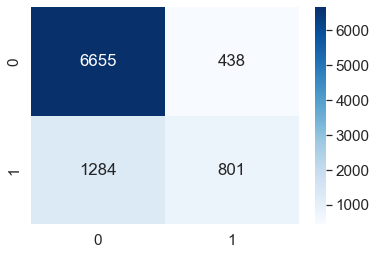

In [18]:
cm = confusion_matrix(Ytest, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d",cmap = "Blues")
plt.show()

In [21]:
print(classification_report(Ytest, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.838267  0.938249  0.885444      7093
           1   0.646489  0.384173  0.481949      2085

    accuracy                       0.812377      9178
   macro avg   0.742378  0.661211  0.683697      9178
weighted avg   0.794700  0.812377  0.793781      9178

